# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [94]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [95]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]
y = y.reshape( y.shape[0], 1)

In [96]:
print('X', X.shape ,' y ', y.shape)


X (100, 3)  y  (100, 1)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [97]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+math.exp(-z))
    
 

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [98]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    pred = np.array([Sigmoid(z) for z in np.matmul(X,theta)])
    return (np.matmul(y.T, np.log(pred)) + np.matmul((1-y.T), (np.log(1-pred)))) / (-len(y))
    

In [99]:
def computeCostNonVect(X,y, theta):
    sum = 0 
    for i in range(X.shape[0]):
        pred = 0 
        for j in range(X.shape[1]):
            pred += theta[j][0] * X[i][j]
        
        pred = Sigmoid(pred)
        sum += y[i]*math.log(pred) + (1-y[i])*math.log(1 - pred)
    
    return sum/(-len(y))

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [100]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1

    cost_trace = np.zeros(iterations)
    theta_trace = np.zeros((theta.shape[0],iterations))
    for i in range(iterations):
        pred = np.array([Sigmoid(z) for z in np.matmul(X,theta)])[:,None]
        theta = theta - (alpha * X.T.dot(pred - y))
        cost_trace[i] = computeCost(X, y, theta)
        theta_trace[:,i] = theta[:,0]

    return theta , np.nan_to_num(cost_trace), theta_trace
        




# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [101]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [102]:
%%time
initialCost=computeCost(X, y, theta)
initialCost

CPU times: user 262 µs, sys: 32 µs, total: 294 µs
Wall time: 300 µs


array([0.69314718])

In [103]:
%%time
initialCost=computeCostNonVect(X, y, theta)
initialCost

CPU times: user 1.26 ms, sys: 0 ns, total: 1.26 ms
Wall time: 1.38 ms


array([0.69314718])

On remarque que les deux fonction computeCost et computeCostNonVect donnent la meme valeur au vecteur theta 
mais la première est plus rapide.

Appel des la fonction de calcul du gradient

In [104]:
# paramètres
iterations = 1500
alpha = 0.01
# Appel
theta, cost_trace, theta_trace = gradientDescent(X, y, theta, alpha, iterations)
#np.matmul(X,theta).shape

<ipython-input-98-2e54ca6ab701>:7: RuntimeWarning: divide by zero encountered in log
  return (np.matmul(y.T, np.log(pred)) + np.matmul((1-y.T), (np.log(1-pred)))) / (-len(y))
<ipython-input-98-2e54ca6ab701>:7: RuntimeWarning: invalid value encountered in matmul
  return (np.matmul(y.T, np.log(pred)) + np.matmul((1-y.T), (np.log(1-pred)))) / (-len(y))


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [105]:
def drawLine(theta):
    a = np.linspace(5,21)
    b = (theta[1][0]*a+ theta[0][0]) / (-theta[2][0])
    plt.plot(a, b, '-g', label='Decision boundary')
    pass

# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

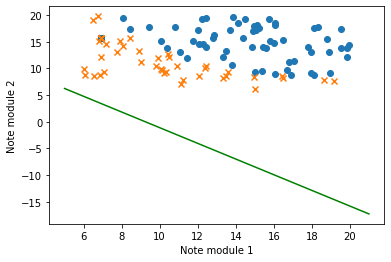

In [106]:
drawLine(theta)
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

Traçage du coût en fonction de theta0 et theta1

Text(0.5, 0, 'Cost')

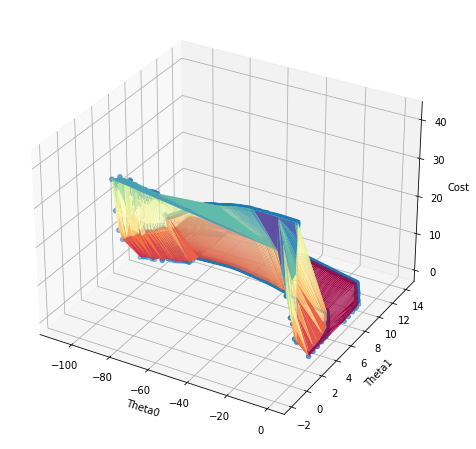

In [107]:
theta0 = theta_trace[0,:]
theta1 = theta_trace[1,:]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta0, theta1, cost_trace)
ax.plot_trisurf(theta0, theta1, cost_trace, cmap=plt.cm.Spectral)
ax.set_ylabel('Theta1')
ax.set_xlabel('Theta0')
ax.set_zlabel('Cost')


Prédire des valeurs de y

In [108]:
# Predire pour des notes note1= 9 et note2=17
def predict(theta, X):
    return 1 if Sigmoid(np.matmul(X,theta)) >= .5  else 0
    
predict(theta, np.array([1, 9, 17])[None, :])

1

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [109]:
from sklearn.linear_model import LogisticRegression
import random

In [134]:
c =random.randint(0,X.shape[0])

reg = LogisticRegression()
reg.fit(X, y[:,0])


print('-----Premiere partie (un seule caracteristique)-----')
print(f'Prediction de sklearn: {int(reg.predict(X[c,:][None, :]))}')
print(f'Prediction de note implementation: {predict(theta, X[c,:][None, :])}')
print(f'Valeur reele: {int(y[c])}')


-----Premiere partie (un seule caracteristique)-----
Prediction de sklearn: 1
Prediction de note implementation: 1
Valeur reele: 1


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage.

En augmentant le nombre d'itération on reçoit une limite de decision beaucoup plus précise.

<ipython-input-98-2e54ca6ab701>:7: RuntimeWarning: divide by zero encountered in log
  return (np.matmul(y.T, np.log(pred)) + np.matmul((1-y.T), (np.log(1-pred)))) / (-len(y))
<ipython-input-98-2e54ca6ab701>:7: RuntimeWarning: invalid value encountered in matmul
  return (np.matmul(y.T, np.log(pred)) + np.matmul((1-y.T), (np.log(1-pred)))) / (-len(y))


Text(0, 0.5, 'Note module 2')

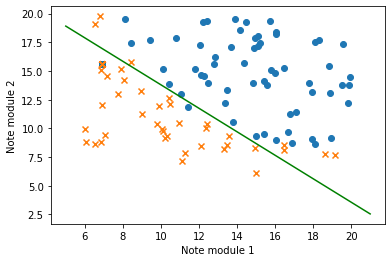

In [111]:
# paramètres
iterations = 10000 
alpha = 0.01
# Appel
theta, cost_trace, theta_trace = gradientDescent(X, y, theta, alpha, iterations)
drawLine(theta)
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [112]:
# bonne chance